In [1]:
#Import the necessary dependencies

In [6]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

#Importing the dataset from skLearn Machine Learning library
from sklearn.datasets import fetch_20newsgroups

#Getting the fetch_20target_names data
news_data = fetch_20newsgroups(subset='train')
news_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [17]:
#Define all of the given Categories 
given_categories = news_data.target_names
#Training the data on the given categories 
training_data = fetch_20newsgroups(subset='train', categories= given_categories)
#Test the data for the given Categories 
testing_data = fetch_20newsgroups(subset='test', categories= given_categories)
#Print the training Data
print(len(testing_data.data))
print(training_data.data[4000])

7532
From: schuch@phx.mcd.mot.com (John Schuch)
Subject: Re: Radio Electronics Free information card
Nntp-Posting-Host: bopper2.phx.mcd.mot.com
Organization: Motorola Computer Group, Tempe, Az.
Lines: 73

In article <C5uLqG.I5@acsu.buffalo.edu> v064mb9k@ubvmsb.cc.buffalo.edu (NEIL B. GANDLER) writes:
>
>	How does the radio Electronics free information cards work.
>Do they just send you some general information about the companies that
>advertise in their magazine or does it also give you sign you up for a
>catalog. 

That depends entirely upon the advertiser whose number you circled.
Radio Electronics compiles all of the cards, then each advertiser
gets a computer printout of the names and addresses of all of the readers
who circled their number. Some magazines also provide the data on
self-adhesive labels, and the really big magazines provide the
data on computer disk.

The advertiser decides what to do with the data they get. You will
notice that the Radio Electronics information car

In [20]:
#Importing the necassary Libraries 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#Creating a model based upon multinomial naive bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Training the model with training data
model.fit(training_data.data, training_data.target)#Data used to train the model
#Creating the label for the given data
labels = model.predict(testing_data.data)#Data used to evaluate the models performance 

Text(110.44999999999996, 0.5, 'Predicted Label')

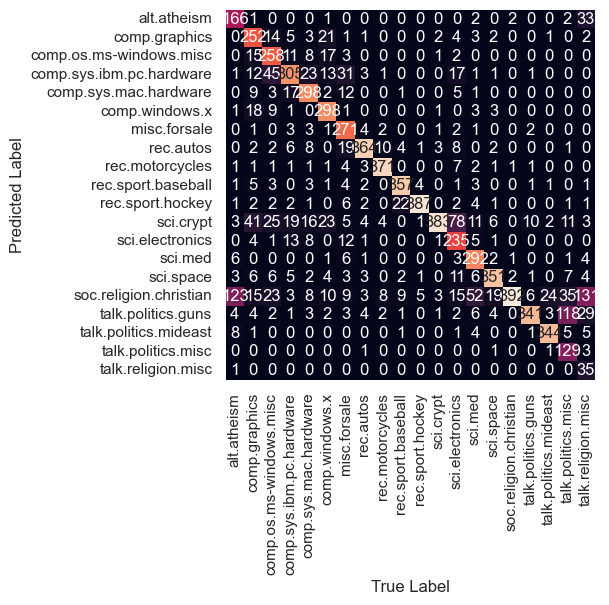

In [23]:
#Creating a confusion matrix
from sklearn.metrics import confusion_matrix
confu_matrix = confusion_matrix(testing_data.target, labels)
sns.heatmap(confu_matrix.T,square=True, annot=True, fmt='d', cbar=False, xticklabels=training_data.target_names, 
            yticklabels=training_data.target_names)

#PLotting Heatmap of confusion matrix
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

In [27]:
#Predicting Category on new data based on the training modeL 
def categories_predicted(s, training_data=training_data, model=model):
    pred = model.predict([s])
    return training_data.target_names[pred[0]]

In [33]:
categories_predicted("Computer")

'sci.space'